In [4]:
import tensorflow as tf
import pandas as pd 
import numpy as np
import contractions
import matplotlib
import random
import nltk
import re
import spacy
import cleaner
import torch
import seaborn as sns
import plotly.express as px

from transformers import AutoTokenizer, AutoModel
from nltk import word_tokenize
from nltk.corpus import stopwords
from nltk.stem.wordnet import WordNetLemmatizer
from tqdm import tqdm

nltk.download('stopwords')
nltk.download('punkt')
nltk.download('wordnet')

stopwords_en = stopwords.words('english')

bert_tokenizer = AutoTokenizer.from_pretrained("microsoft/codebert-base")
bert_model = AutoModel.from_pretrained("microsoft/codebert-base")

lemmatizer = WordNetLemmatizer()

tqdm.pandas()

nlp = spacy.load('en_core_web_lg')
nlp.max_length = 1_500_000

[nltk_data] Downloading package stopwords to /home/ae/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /home/ae/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to /home/ae/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [12]:
df = pd.read_pickle('../scripts/clean_chunks')

In [13]:
df['line_count'] = df['source'].progress_apply(lambda x: x.count('\n'))
df['line_count']

100%|████████████████████| 42501/42501 [00:00<00:00, 450667.84it/s]


0        13
1         6
2        32
3        24
4        23
         ..
42496    38
42497    47
42498    56
42499    43
42500    45
Name: line_count, Length: 42501, dtype: int64

In [14]:
lines: pd.DataFrame= df[['language', 'line_count']].copy()
lines['count'] = 1
lines: pd.DataFrame = lines.groupby(by='language').sum()

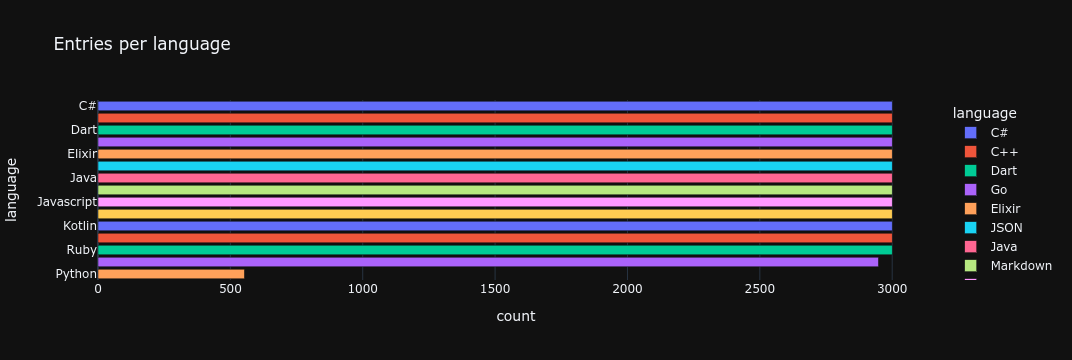

In [18]:
fig = px.bar(lines
        .sort_values(by='count', ascending=False)['count']
        .head(30).to_frame().reset_index(), 
    x="count", y="language", template="plotly_dark", color="language", title="Entries per language"
)


with open("../resources/entries_per_lang_aungment.json", "w") as spcy:
    spcy.write(fig.to_json())

fig.show()

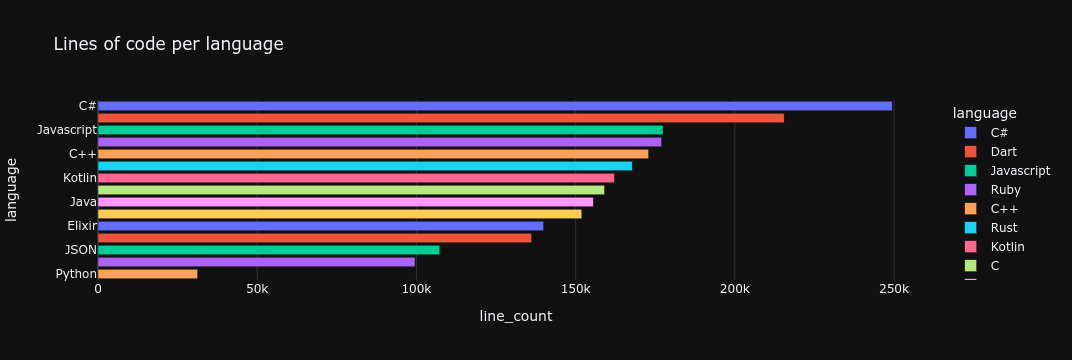

In [19]:
fig = px.bar(lines
        .sort_values(by='line_count', ascending=False)['line_count']
        .head(30).to_frame().reset_index(), 
    x="line_count", y="language", template="plotly_dark", color="language", title="Lines of code per language"
)

with open("../resources/lines_of_code_per_lang_augment.json", "w") as spcy:
    spcy.write(fig.to_json())

fig.show()